# Classifiers and Categorical Data

Lecture 2/27/2020
Materials and code courtesy of Na-Rae Han

## A Brief Review of Count Vectors and TD-IDF Vectorizer

### What is a Count Vector?

Info about the CountVector() function: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

"Convert a collection of text documents to a matrix of token counts"
* Each row represents a document
* Each column represents a token count

### What is TF-IDF Vectorizer?

Info about the TfidfTransformer() function: http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html

"Scale down the impact of tokens that occur very frequently in a given corpus and that are hence empirically less informative than features that occur in a small fraction of the training corpus."

Info about the TfidfVectorizer() function: http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

"Equivalent to CountVectorizer followed by TfidfTransformer."

### Why do we use them?
Text can't be put directly into a classifier. They require numerical data. These functions allow us to (1) convert the text into token counts vectors and (2) convert these token count vectors into numbers that even out effects of very large counts

### How can we use them effectively?

Let's take a brief detour into Tuesday's code, with slight modifications...

In [1]:
# Turns on/off pretty printing 
%pprint

# Every returned Out[] is displayed, not just the last one. 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Pretty printing has been turned OFF


In [2]:
import numpy as np
import pandas as pd
import sklearn               
import nltk 

import matplotlib.pyplot as plt
import seaborn as sns        
sns.set_style('darkgrid')

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
#Remove the -1 from your path
english = pd.read_csv('../../Class-Exercise-Repo-1/activity3/english_updated.csv', index_col='Index')

In [4]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()   # downloads training data by default: subset='train'. test', 'all'
data.target_names

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']

In [5]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# pipeline! See textbook. 
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [7]:
# train model
model.fit(train.data, train.target)

# predict labels on test data
labels = model.predict(test.data)

Pipeline(memory=None,
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth...   vocabulary=None)), ('multinomialnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [8]:
from sklearn.metrics import confusion_matrix
mat1 = confusion_matrix(test.target, labels)
mat1

array([[344,  13,  32,   0],
       [  6, 364,  24,   0],
       [  1,   5, 392,   0],
       [  4,  12, 187,  48]], dtype=int64)

In [9]:
from sklearn.metrics import accuracy_score
accuracy_score(test.target, labels)

0.8016759776536313

We got 80% accuracy by using the standard TfidfVectorizer function. What happens when we modify it?

### The TfidfVectorizer() function:
It has many parameters. Let's look at a few...
* min_df: Only include words that occur above this minimum document frequency (between 0 and 1 OR an int)
    * a cut-off
* max_df: Only include words that occur below this maximum document frequency (between 0 and 1 OR an int)
    * Corpus-specific stop words
* max_features: Only include the top N features (ordered by frequency)
* stop_words: a list of words to be ignored for tokenization
    * How might you choose your stop words?

Questions to ask when adjusting these arguments:
1. How am I limiting my data?
2. Why am I limiting my data in this way?

### Fudging around with these arguments:
Let's start simple--what if we get rid of english stop words?

In [10]:
model2 = make_pipeline(TfidfVectorizer(stop_words = 'english'), MultinomialNB())

# train model
model2.fit(train.data, train.target)

# predict labels on test data
labels2 = model2.predict(test.data)

mat2 = confusion_matrix(test.target, labels2)

Pipeline(memory=None,
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth...   vocabulary=None)), ('multinomialnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [11]:
print("Including Stop Words:")
accuracy_score(test.target, labels)
mat1

print("Excluding Stop Words:")
accuracy_score(test.target, labels2)
mat2

Including Stop Words:


0.8016759776536313

array([[344,  13,  32,   0],
       [  6, 364,  24,   0],
       [  1,   5, 392,   0],
       [  4,  12, 187,  48]], dtype=int64)

Excluding Stop Words:


0.8561452513966481

array([[367,  13,   9,   0],
       [  9, 379,   6,   0],
       [  2,   5, 389,   2],
       [  5,  20, 135,  91]], dtype=int64)

Text(0.5, 16.0, 'true label')

Text(92.68, 0.5, 'predicted label')

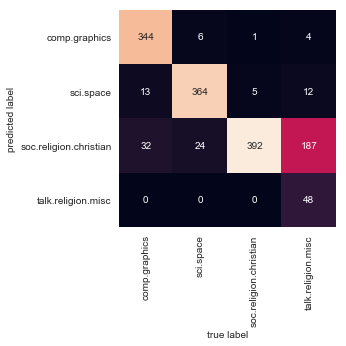

Text(0.5, 16.0, 'true label')

Text(92.68, 0.5, 'predicted label')

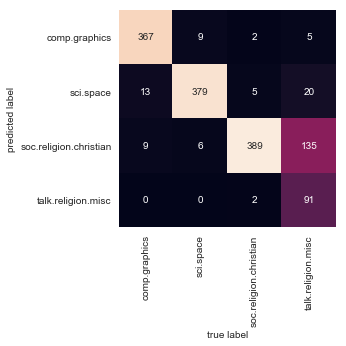

In [12]:
sns.heatmap(mat1.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

sns.heatmap(mat2.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

That got our accuracy score up about 5%! What if we change other things?

In [13]:
#Only include the top 3000 features
model3 = make_pipeline(TfidfVectorizer(max_features = 3000), MultinomialNB())

# train model
model3.fit(train.data, train.target)

# predict labels on test data
labels3 = model3.predict(test.data)

mat3 = confusion_matrix(test.target, labels3)

Pipeline(memory=None,
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=3000, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth...   vocabulary=None)), ('multinomialnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [14]:
mat3

array([[373,   7,   7,   2],
       [ 21, 366,   7,   0],
       [  6,   3, 386,   3],
       [  8,  16, 116, 111]], dtype=int64)

In [15]:
accuracy_score(test.target, labels3)

0.8631284916201117

An even higher accuracy score! But what has changed in how it categorizes?

Text(0.5, 16.0, 'true label')

Text(92.68, 0.5, 'predicted label')

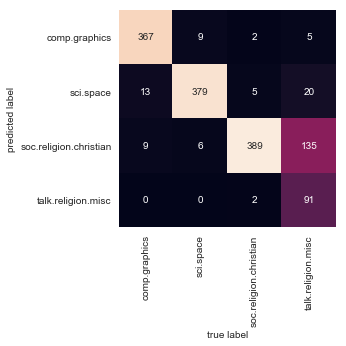

Text(0.5, 16.0, 'true label')

Text(92.68, 0.5, 'predicted label')

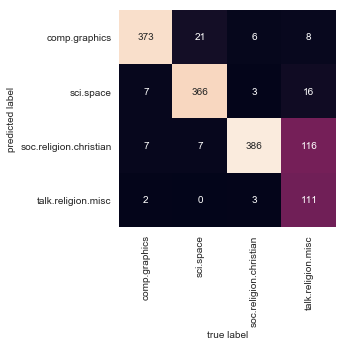

In [16]:
sns.heatmap(mat2.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

sns.heatmap(mat3.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

Suggests that including too many features causes the classifier to take features into account that aren't truly relevant

Porque no las dos?

In [17]:
model4 = make_pipeline(TfidfVectorizer(max_features = 3000, stop_words = 'english'), MultinomialNB())

# train model
model4.fit(train.data, train.target)

# predict labels on test data
labels4 = model4.predict(test.data)

mat4 = confusion_matrix(test.target, labels4)

Pipeline(memory=None,
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=3000, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth...   vocabulary=None)), ('multinomialnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [18]:
mat4
accuracy_score(test.target, labels4)

array([[375,   9,   3,   2],
       [ 25, 368,   1,   0],
       [  8,   4, 378,   8],
       [ 10,  17,  85, 139]], dtype=int64)

0.8798882681564246

In [19]:
# Wow! Now we're up to almost 88% accuracy! Recall, what was our baseline?
np.unique(train.target, return_counts=True) #returns two arrays, one with value counts of each category

(array([0, 1, 2, 3], dtype=int32), array([584, 593, 599, 377]))

In [20]:
599 / np.sum(train.target) # our baseline if we were looking purely based on frequency in our training data

0.20499657768651608

Maybe we think that 3000 features isn't nearly enough. What if I choose 50,000?

In [21]:
model5 = make_pipeline(TfidfVectorizer(max_features = 50000, stop_words = 'english'), MultinomialNB())

# train model
model5.fit(train.data, train.target)

# predict labels on test data
labels5 = model5.predict(test.data)

mat5 = confusion_matrix(test.target, labels5)

Pipeline(memory=None,
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=50000, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smoot...   vocabulary=None)), ('multinomialnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [22]:
accuracy_score(test.target, labels5) # a lower accuracy score here...

0.8561452513966481

What about min_df and max_df?

In [23]:
model6 = make_pipeline(TfidfVectorizer(min_df = 0.5, stop_words = 'english'), MultinomialNB())

# train model
model6.fit(train.data, train.target)

# predict labels on test data
labels6 = model6.predict(test.data)

mat6 = confusion_matrix(test.target, labels6)

Pipeline(memory=None,
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=0.5,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smoo...   vocabulary=None)), ('multinomialnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [24]:
accuracy_score(test.target, labels6) #uh oh...

0.31075418994413406

What happened? Recall what min_df DOES!
Only looking at words that occur at least 50% of documents!?!? Motivation 

## Support Vector Classifier: an alternative

Let's take a look at how well this does

In [25]:
from sklearn.svm import SVC # "Support vector classifier"

model = make_pipeline(TfidfVectorizer(max_features = 3000, stop_words = 'english'), SVC())
# model = SVC(kernel='linear', C=1E5)  # 10^5: a large & hard margin
                                     # keeps training accuracy high
model.fit(train.data, train.target)

c:\users\cassi\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Pipeline(memory=None,
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=3000, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth...f', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [26]:
labels = model.predict(test.data)
labels

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [27]:
accuracy_score(test.target, labels) #oh my--that's awful! What happened?

0.2779329608938548

Let's take a look at SVC and what it does: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

Was that really helpful for what it is? Good ol' Wikipedia: https://en.wikipedia.org/wiki/Support-vector_machine
* Essentially, maps each category to a point in space based on features, then finds the optimal line to separate each category

In [28]:
model = make_pipeline(TfidfVectorizer(max_features = 3000, stop_words = 'english'), SVC(kernel='rbf', C=1E5))
# model = SVC(kernel='linear', C=1E5)  # 10^5: a large & hard margin
                                     # keeps training accuracy high
model.fit(train.data, train.target)

Pipeline(memory=None,
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=3000, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth...f', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [29]:
labels = model.predict(test.data)

In [30]:
cm = confusion_matrix(test.target, labels)
cm

array([[373,   7,   3,   6],
       [ 15, 372,   5,   2],
       [  4,   4, 366,  24],
       [ 15,  16,  36, 184]], dtype=int64)

In [31]:
accuracy_score(test.target, labels) # A LOT better! What happened?

0.9043296089385475

Text(0.5, 16.0, 'true label')

Text(84.40000000000006, 0.5, 'predicted label')

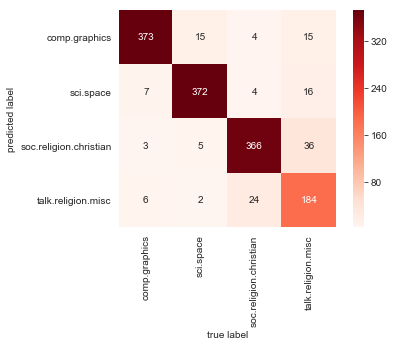

In [32]:
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=True, cmap="Reds", 
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

How do these results differ from Multinomial Bayes? Look at the differences in confusion between christian texts and misc. religious texts...

## Categorical Data

Central Questions:
* What data is truly categorical?
* Can we put the data directly into a classifier for machine learning?

In [33]:
# transfer file!
essay_df = pd.read_pickle(r"../../HW2-Repo-1/jevon/ets_corpus_essay_df.pkl")

In [34]:
essay_df.head()

,Filename,Prompt,L1,Score,Partition,Text,Tokens,Token_count,Score123,Avg_slen,TTR,TTR2,Avg_wlen,Avg_google_kband
0,88.txt,P6,KOR,high,DV,Some people might think that traveling in a gr...,"[Some, people, might, think, that, traveling, ...",416,3,24.470588,0.367788,0.420,3.942708,1.539267
1,278.txt,P6,DEU,medium,TR,IThe importance and popularity of travelling i...,"[IThe, importance, and, popularity, of, travel...",339,2,26.076923,0.365782,0.436,4.028037,1.438095
2,348.txt,P1,TUR,high,TR,"It is an important decision, how to plan your ...","[It, is, an, important, decision, ,, how, to, ...",394,3,28.142857,0.479695,0.556,4.424581,1.844193
3,666.txt,P2,ZHO,medium,TR,Some people believe that young people can enjo...,"[Some, people, believe, that, young, people, c...",379,2,27.071429,0.437995,0.532,4.133136,1.546828
4,733.txt,P6,TEL,medium,TR,Travelling is usually considered as good recr...,"[Travelling, is, usually, considered, as, good...",354,2,59.000000,0.418079,0.480,4.252976,1.733746


Which columns contain categorical data?
If a column contains categorical data, is it nominal or ordinal?

#### Ordinal Categorial Data
* Scores: low, medium, high
    * 3 target labels (can be used as-is)
    * to use them as a feature, must turn these into numbers (strings cannot be directly used as features)
* Score123: 1, 2, or 3
    * if treated as real numbers, a regression model is appropriate (continuous variables then must be binned)
    * if treated as 3 discrete targets, can use a classification model with 3 target labels
    
#### Nominal Categorial Data
* L1
* Prompt
    * Can both be used as targets as-is
    * To be used as features, must be decomposed
    
#### Decomposing strings into a set of binary, independent features
3 options
1. Encode value labels as integers via LabelEncoder. THEN, map integer lables into set of binary-valued columns via OneHotEncoder
2. Transform column of categorical data into set of dummy variables via pandas.get_dummies
3. Use sparse vector format via DictVectorizer (in textbook)


##### Option 1: LabelEncoder + OneHotEncoder

In [35]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [36]:
mini = essay_df[-10:][['Prompt', 'L1', 'Score']]
mini
# 6 different L1 represented.

,Prompt,L1,Score
12090,P6,HIN,medium
12091,P6,ZHO,medium
12092,P8,DEU,high
12093,P2,KOR,medium
12094,P7,JPN,medium
12095,P1,ZHO,medium
12096,P8,KOR,high
12097,P5,SPA,high
12098,P5,HIN,high
12099,P1,ZHO,medium


In [37]:
# Maps string values to integers. 
lenc = LabelEncoder()
lenc.fit(mini['L1'])
lenc.transform(mini['L1'])

LabelEncoder()

array([1, 5, 0, 3, 2, 5, 3, 4, 1, 5])

In [38]:
mini['L1'] = lenc.transform(mini['L1'])
mini

,Prompt,L1,Score
12090,P6,1,medium
12091,P6,5,medium
12092,P8,0,high
12093,P2,3,medium
12094,P7,2,medium
12095,P1,5,medium
12096,P8,3,high
12097,P5,4,high
12098,P5,1,high
12099,P1,5,medium


In [39]:
# Turns multi-valued L1 column into 6 columns of binary values, 
#     in sparse vector format. 
ohenc = OneHotEncoder()

# In sparse vector, but small enough to cast to array
ohenc.fit_transform(mini[['L1']]).toarray()

c:\users\cassi\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.]])

##### Option 2: Use pandas.get_dummies

In [40]:
# Re-build mini DF
mini = essay_df[-10:][['Prompt', 'L1', 'Score']]
mini

,Prompt,L1,Score
12090,P6,HIN,medium
12091,P6,ZHO,medium
12092,P8,DEU,high
12093,P2,KOR,medium
12094,P7,JPN,medium
12095,P1,ZHO,medium
12096,P8,KOR,high
12097,P5,SPA,high
12098,P5,HIN,high
12099,P1,ZHO,medium


In [41]:
# Decomposes L1 column into 6 binary columns. 
pd.get_dummies(mini, columns=['L1'])

,Prompt,Score,L1_DEU,L1_HIN,L1_JPN,L1_KOR,L1_SPA,L1_ZHO
12090,P6,medium,0,1,0,0,0,0
12091,P6,medium,0,0,0,0,0,1
12092,P8,high,1,0,0,0,0,0
12093,P2,medium,0,0,0,1,0,0
12094,P7,medium,0,0,1,0,0,0
12095,P1,medium,0,0,0,0,0,1
12096,P8,high,0,0,0,1,0,0
12097,P5,high,0,0,0,0,1,0
12098,P5,high,0,1,0,0,0,0
12099,P1,medium,0,0,0,0,0,1


In [42]:
# Decomposition on both Prompt and L1.  
pd.get_dummies(mini, columns=['Prompt', 'L1'])

# Works, looking tidy, but lots of wasted space with 0s
# It would be more efficient to use a sparse vector...

,Score,Prompt_P1,Prompt_P2,Prompt_P5,Prompt_P6,Prompt_P7,Prompt_P8,L1_DEU,L1_HIN,L1_JPN,L1_KOR,L1_SPA,L1_ZHO
12090,medium,0,0,0,1,0,0,0,1,0,0,0,0
12091,medium,0,0,0,1,0,0,0,0,0,0,0,1
12092,high,0,0,0,0,0,1,1,0,0,0,0,0
12093,medium,0,1,0,0,0,0,0,0,0,1,0,0
12094,medium,0,0,0,0,1,0,0,0,1,0,0,0
12095,medium,1,0,0,0,0,0,0,0,0,0,0,1
12096,high,0,0,0,0,0,1,0,0,0,1,0,0
12097,high,0,0,1,0,0,0,0,0,0,0,1,0
12098,high,0,0,1,0,0,0,0,1,0,0,0,0
12099,medium,1,0,0,0,0,0,0,0,0,0,0,1


Looks good...but there's something wrong here...

### The Dummy Variable Trap
* Recall, we want these features to be INDEPENDENT
* For Prompt and L1, there's one redundant column
    * If all others are labeled, can predict the last L1 or prompt based on the others
    
This is *multi-collinearity* and causes problems in certain machine learning models (not to mention you don't want to enter redundant info in general)

We must REMOVE a column for each feature category. For more info, see https://shanlodh.wordpress.com/2018/03/05/beward-silent-multi-collinearity-from-dummy-variables-in-sklearn/

In [43]:
# Use drop_first=True to avoid creating perfectly correlated variables
pd.get_dummies(mini, columns=['Prompt', 'L1'], drop_first=True)

# All right -- it takes only 5 columns to encode 6 distinct values

,Score,Prompt_P2,Prompt_P5,Prompt_P6,Prompt_P7,Prompt_P8,L1_HIN,L1_JPN,L1_KOR,L1_SPA,L1_ZHO
12090,medium,0,0,1,0,0,1,0,0,0,0
12091,medium,0,0,1,0,0,0,0,0,0,1
12092,high,0,0,0,0,1,0,0,0,0,0
12093,medium,1,0,0,0,0,0,0,1,0,0
12094,medium,0,0,0,1,0,0,1,0,0,0
12095,medium,0,0,0,0,0,0,0,0,0,1
12096,high,0,0,0,0,1,0,0,1,0,0
12097,high,0,1,0,0,0,0,0,0,1,0
12098,high,0,1,0,0,0,1,0,0,0,0
12099,medium,0,0,0,0,0,0,0,0,0,1


Wait, doesn't OneHotEncoder also run into the dummy variable trap?
Yes! But people don't typically use OneHotCoder for our purposes. Instead, they use it for other methods, like unsupervised classification. 

##### Option 3: sklearn's DictVectorizer
See the [textbook example](https://jakevdp.github.io/PythonDataScienceHandbook/05.04-feature-engineering.html#Categorical-Features)